## Import the basic libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [44]:
# load the data set
df = pd.read_csv("../training_data/training_set.csv")


## EDA

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,109120.0,12.269056,6.396149,-8.5,7.7,12.1,16.9,33.9
MaxTemp,109401.0,23.325253,7.129078,-4.1,18.0,22.7,28.4,48.1
Rainfall,108552.0,2.338656,8.472995,0.0,0.0,0.0,0.6,371.0
Evaporation,64238.0,5.449992,4.143162,0.0,2.6,4.8,7.4,82.4
Sunshine,59817.0,7.625088,3.801504,0.0,4.8,8.5,10.7,14.5
WindGustSpeed,102156.0,39.967276,13.523854,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,108459.0,13.979126,8.888911,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,107885.0,18.626139,8.802497,0.0,13.0,19.0,24.0,87.0
Humidity9am,108482.0,68.760117,19.119738,0.0,57.0,70.0,83.0,100.0
Humidity3pm,107606.0,51.391428,20.845954,0.0,36.0,52.0,66.0,100.0


In [46]:
# remove RISK_MM column as it contains rain information about tomorrow
df = df.drop("RISK_MM", axis = 1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109641 entries, 0 to 109640
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109641 non-null  object 
 1   Location       109641 non-null  object 
 2   MinTemp        109120 non-null  float64
 3   MaxTemp        109401 non-null  float64
 4   Rainfall       108552 non-null  float64
 5   Evaporation    64238 non-null   float64
 6   Sunshine       59817 non-null   float64
 7   WindGustDir    102101 non-null  object 
 8   WindGustSpeed  102156 non-null  float64
 9   WindDir9am     101715 non-null  object 
 10  WindDir3pm     106927 non-null  object 
 11  WindSpeed9am   108459 non-null  float64
 12  WindSpeed3pm   107885 non-null  float64
 13  Humidity9am    108482 non-null  float64
 14  Humidity3pm    107606 non-null  float64
 15  Pressure9am    98777 non-null   float64
 16  Pressure3pm    98822 non-null   float64
 17  Cloud9am       68957 non-null

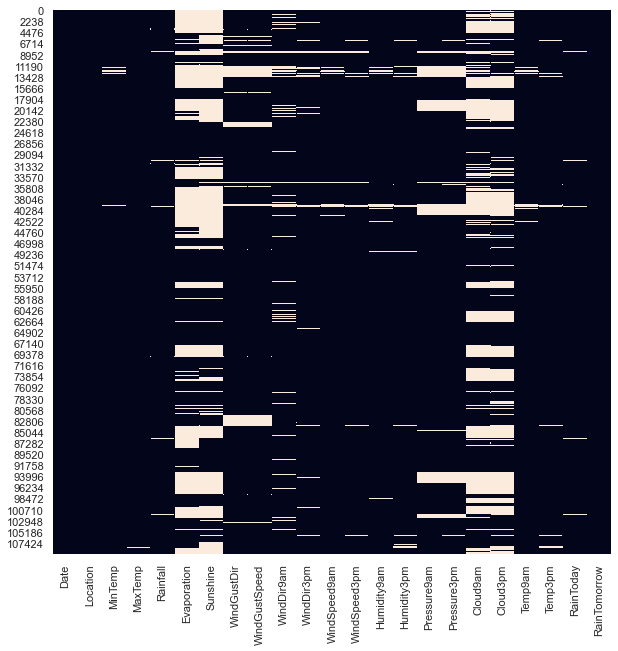

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

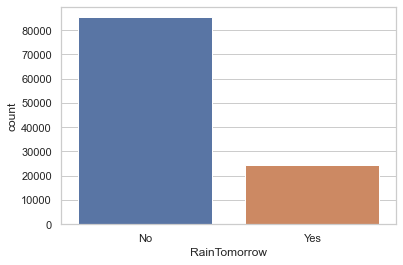

In [49]:
sns.countplot(df['RainTomorrow'])

In [50]:
# categorical and numerical varialbes

num_columns = [ col for col in df.columns if df[col].dtype=="float64"]
cat_columns = [col for col in df.columns if df[col].dtype=="O"]

num_variables = df[num_columns]
cat_variables = df[cat_columns]

In [9]:
print ('numericalcolumns:', num_columns) 
print ('\n categorical columns:', cat_columns)

numericalcolumns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

 categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

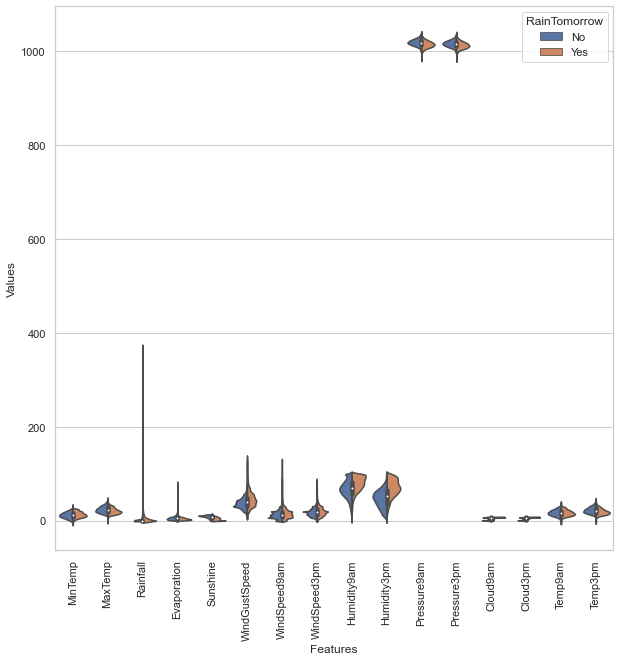

In [51]:
# violine plot to see the outliers
violine_plot = pd.concat([df['RainTomorrow'],num_variables], axis=1) 
violine_plot = pd.melt(violine_plot, id_vars="RainTomorrow", var_name="Features", value_name='Values')
plt.figure(figsize=(10,10))
# Setting the violinplot objetc with respecitve atributes
sns.violinplot(x="Features", y="Values", hue="RainTomorrow", data=violine_plot, split = True)
# Rotation of x ticks
plt.xticks(rotation=90)

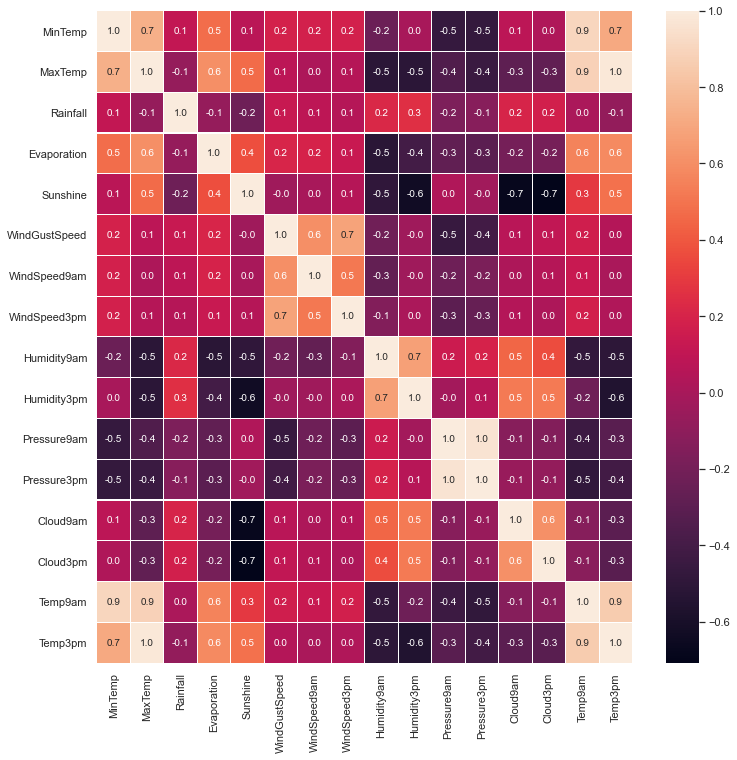

In [52]:
matrix_corr = df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_corr,annot=True, fmt=".1f",linewidths="0.1")

#### observations from the matrix
* Pressure9am and Pressure3pm have very strong correlation(almost 1)
* MinTemp, MaxTemp, Temp9am, Temp3pm have strong correlation between them.
* WindGustSpeed, WindSpeed9am, WindSpeed3pm have moderate correlation between them. 
* Humidity9am, Humidity3pm have moderate correlation between them.
* Cloud9am, Cloud3pm have moderate correlation between them.

## Handling Missing Values and Variables Encoding

In [53]:
# handing missing values on numerical variables

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
a = imputer.fit_transform(num_variables)
num_var = pd.DataFrame(a, columns = num_columns, index = df.index)

In [54]:
# handling missing values on categorical variables
cat_var= cat_variables.fillna(cat_variables.mode().iloc[0])

In [55]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in cat_var.loc[:, cat_var.columns != 'Date'].select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    cat_var[col] = lencoders[col].fit_transform(cat_var[col])

In [56]:
# formating the Date column
cat_var["Date"] = pd.to_datetime(cat_var["Date"])
cat_var["Day"] = cat_var['Date'].dt.day
cat_var["Month"] = cat_var['Date'].dt.month
cat_var["Year"] = cat_var['Date'].dt.year
cat_var = cat_var.drop('Date', axis = 1)

In [57]:
cat_var.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,2,13,13,14,0,0,1,12,2008
1,2,14,6,15,0,0,2,12,2008
2,2,15,13,15,0,0,3,12,2008
3,2,4,9,0,0,0,4,12,2008
4,2,13,1,7,0,0,5,12,2008


In [58]:
# numeric variables feature scalling
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

scaler = MinMaxScaler()
scalled = scaler.fit_transform(num_var)
num_var = pd.DataFrame(scalled, columns = num_columns, index = df.index)


In [59]:
df_prepared = pd.concat([num_var,cat_var], axis=1)

In [60]:
df_prepared.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,0.516509,0.517241,0.001617,0.058252,0.586207,0.294574,0.153846,0.275862,0.71,0.22,...,0.519305,2,13,13,14,0,0,1,12,2008
1,0.375000,0.559387,0.000000,0.058252,0.586207,0.294574,0.030769,0.252874,0.44,0.25,...,0.567568,2,14,6,15,0,0,2,12,2008
2,0.504717,0.570881,0.000000,0.058252,0.586207,0.310078,0.146154,0.298851,0.38,0.30,...,0.546332,2,15,13,15,0,0,3,12,2008
3,0.417453,0.614943,0.000000,0.058252,0.586207,0.139535,0.084615,0.103448,0.45,0.16,...,0.610039,2,4,9,0,0,0,4,12,2008
4,0.613208,0.697318,0.002695,0.058252,0.586207,0.271318,0.053846,0.229885,0.82,0.33,...,0.671815,2,13,1,7,0,0,5,12,2008


In [61]:
X = df_prepared.drop(["RainTomorrow"], axis = 1)
y = df_prepared['RainTomorrow']


## Training Models

In [75]:
# training the models

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

clf_a = DecisionTreeClassifier(random_state = 0)
clf_b = RandomForestClassifier(random_state = 0)
clf_c = LogisticRegression(random_state = 0)
clf_d = SGDClassifier(random_state = 0)
clf_e = SVC( kernel = 'poly')

list_clf = [clf_a, clf_b, clf_c, clf_d, clf_e]

results = []
for clf in list_clf:
    clf_name = clf.__class__.__name__
    scores_f1 = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
    scores_ = cross_val_score(clf, X, y, cv=5)
    results.append([clf_name, np.mean(scores_f1), np.mean(scores_)])

df_results = pd.DataFrame(np.array(results), columns = ['Algorithm', 'F1-Score', 'Accuracy'])


In [76]:
df_results.sort_values(by=['F1-Score'], ascending=False)



,Algorithm,F1-Score,Accuracy
1,RandomForestClassifier,0.57608772559316,0.8441458765577059
0,DecisionTreeClassifier,0.4847839931962148,0.753677806567176
2,LogisticRegression,0.4500836863891967,0.8063954000730259
3,SGDClassifier,0.06822101564995209,0.7850257357710215
4,SVC,0.0,0.7783219780183765


## PCA

In [78]:
from sklearn.decomposition import PCA

clf_pca = RandomForestClassifier(random_state=0)

list_n = [5,10,20]

results_pca = []
for i in list_n:
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X)
    scores_f1 = cross_val_score(clf_pca, X_pca, y, cv=5, scoring = 'f1')
    scores_ = cross_val_score(clf_pca, X_pca, y, cv=5)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    results_pca.append([i, explained_variance, np.mean(scores_f1), np.mean(scores_)])

df_results_pca = pd.DataFrame(np.array(results_pca))
df_results_pca.columns = ['Number of components', 'Cumulative Explained Variance Ration','F1-Score', 'Accuracy']
df_results_pca.sort_values(by=['F1-Score'], ascending=False)

,Number of components,Cumulative Explained Variance Ration,F1-Score,Accuracy
2,20.0,0.999995,0.561325,0.840188
1,10.0,0.999622,0.462103,0.812315
0,5.0,0.958172,0.102958,0.727921


## Feature Importance 

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

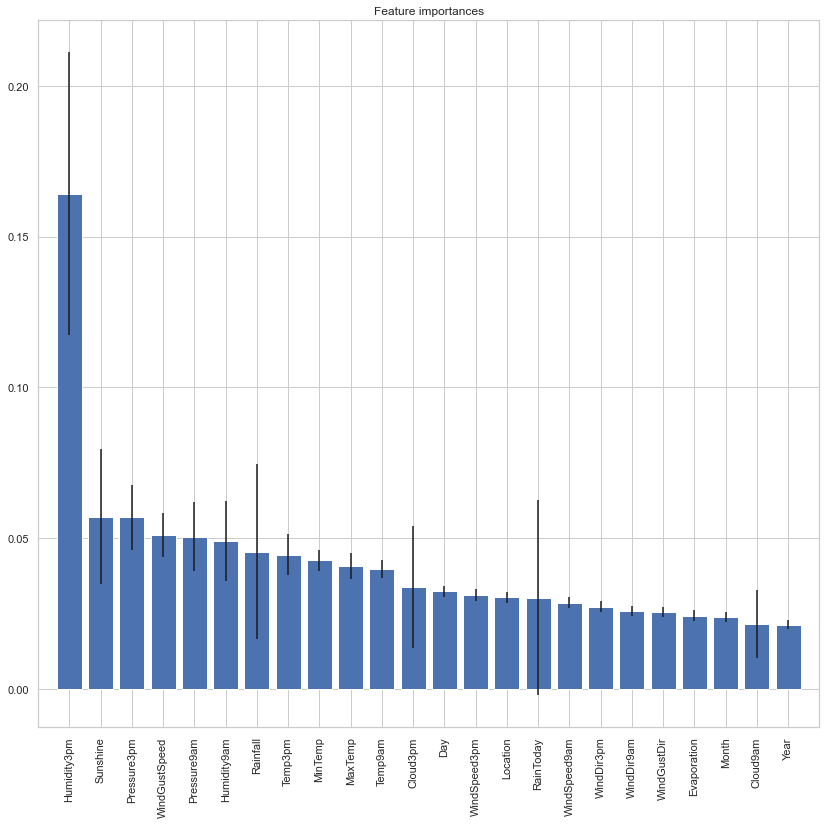

In [80]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Parameter Tuning

In [81]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf_grid = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf_grid, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [82]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [84]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [85]:
cv_pred = rfc1.predict(X_test)

In [86]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,cv_pred))

Accuracy for Random Forest on CV data:  0.8447717634183045


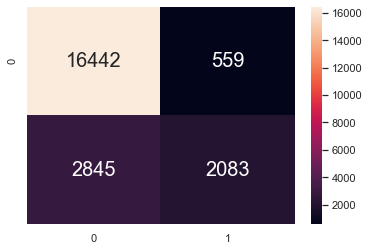

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,cv_pred)
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3)